<h1 style="color: 	#440154;"><strong>FungiScan</strong></h1>

In [ ]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../src'))
from data_processing import evaluate_and_report_model, optimize_model_with_gridsearch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# Definir los nombres de las columnas para el dataset de hongos
column_names_mushrooms = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]
df_mushrooms = pd.read_csv("../data/agaricus-lepiota.data", header=None, names=column_names_mushrooms, sep=',')

<h2 style="color: 	#440154;"><strong>Limpieza de datos</strong></h2>

In [2]:
# En este dataset, los valores faltantes están representados por '?'.
# Los reemplazamos por np.nan para que Pandas los reconozca como tal.
df_mushrooms.replace('?', np.nan, inplace=True)

# Como puedes ver, solo 'stalk-root' tiene NaNs.
df_mushrooms.drop(['stalk-root', 'veil-type'], axis=1, inplace=True)

<h3 style="color: 	#440154;"><strong>Descripción Detallada de las Características del Hongo</strong></h3>

Este dataset contiene descripciones de hongos hipotéticos de las familias *Agaricus* y *Lepiota*, cada uno identificado como comestible o venenoso. Comprender el significado de cada característica y sus valores es fundamental para nuestro análisis.

---

<h3 style="color: 	#440154;"><strong>Variable Objetivo (Clase)</strong></h3>

La columna **`class`** representa la etiqueta que nuestro modelo intentará predecir:

* **`e`**: **Comestible** (edible)
* **`p`**: **Venenoso** (poisonous)

---

<h3 style="color: 	#440154;"><strong>Características Descriptivas</strong></h3>

A continuación, se describen las 22 características morfológicas de los hongos, junto con el significado de cada uno de sus valores categóricos:

##### **Forma y Superficie del Sombrero (Cap)**

* **`cap-shape`**: Forma del sombrero
    * `b`: Campana (bell)
    * `c`: Cónica (conical)
    * `x`: Convexa (convex)
    * `f`: Plana (flat)
    * `k`: Nudosa (knobbed)
    * `s`: Hundida (sunken)

* **`cap-surface`**: Superficie del sombrero
    * `f`: Fibrosa (fibrous)
    * `g`: Con ranuras (grooves)
    * `y`: Escamosa (scaly)
    * `s`: Lisa (smooth)

* **`cap-color`**: Color del sombrero
    * `n`: Marrón (brown)
    * `b`: Beige (buff)
    * `c`: Canela (cinnamon)
    * `g`: Gris (gray)
    * `r`: Verde (green)
    * `p`: Rosa (pink)
    * `u`: Púrpura (purple)
    * `e`: Rojo (red)
    * `w`: Blanco (white)
    * `y`: Amarillo (yellow)

##### **Magulladuras y Olor**

* **`bruises`**: Presencia de magulladuras
    * `t`: Con magulladuras (bruises)
    * `f`: Sin magulladuras (no)

* **`odor`**: Olor del hongo
    * `a`: Almendra (almond)
    * `l`: Anís (anise)
    * `c`: Creosota (creosote)
    * `y`: A pescado (fishy)
    * `f`: Fétido (foul)
    * `m`: A moho (musty)
    * `n`: Ninguno (none)
    * `p`: Picante (pungent)
    * `s`: Especiado (spicy)

##### **Características de las Láminas (Gills)**

* **`gill-attachment`**: Adhesión de las láminas al tallo
    * `a`: Adheridas (attached)
    * `d`: Descendentes (descending)
    * `f`: Libres (free)
    * `n`: Con muescas (notched)

* **`gill-spacing`**: Espaciado entre las láminas
    * `c`: Cercanas (close)
    * `w`: Apiñadas (crowded)
    * `d`: Distantes (distant)

* **`gill-size`**: Tamaño de las láminas
    * `b`: Anchas (broad)
    * `n`: Estrechas (narrow)

* **`gill-color`**: Color de las láminas
    * `k`: Negro (black)
    * `n`: Marrón (brown)
    * `b`: Beige (buff)
    * `h`: Chocolate (chocolate)
    * `g`: Gris (gray)
    * `r`: Verde (green)
    * `o`: Naranja (orange)
    * `p`: Rosa (pink)
    * `u`: Púrpura (purple)
    * `e`: Rojo (red)
    * `w`: Blanco (white)
    * `y`: Amarillo (yellow)

##### **Características del Tallo (Stalk)**

* **`stalk-shape`**: Forma general del tallo
    * `e`: Ensanchándose hacia la base (enlarging)
    * `t`: Afilándose hacia la base (tapering)

* **`stalk-surface-above-ring`**: Superficie del tallo por encima del anillo
    * `f`: Fibrosa (fibrous)
    * `y`: Escamosa (scaly)
    * `k`: Sedosa (silky)
    * `s`: Lisa (smooth)

* **`stalk-surface-below-ring`**: Superficie del tallo por debajo del anillo
    * `f`: Fibrosa (fibrous)
    * `y`: Escamosa (scaly)
    * `k`: Sedosa (silky)
    * `s`: Lisa (smooth)

* **`stalk-color-above-ring`**: Color del tallo por encima del anillo
    * `n`: Marrón (brown)
    * `b`: Beige (buff)
    * `c`: Canela (cinnamon)
    * `g`: Gris (gray)
    * `o`: Naranja (orange)
    * `p`: Rosa (pink)
    * `e`: Rojo (red)
    * `w`: Blanco (white)
    * `y`: Amarillo (yellow)

* **`stalk-color-below-ring`**: Color del tallo por debajo del anillo
    * `n`: Marrón (brown)
    * `b`: Beige (buff)
    * `c`: Canela (cinnamon)
    * `g`: Gris (gray)
    * `o`: Naranja (orange)
    * `p`: Rosa (pink)
    * `e`: Rojo (red)
    * `w`: Blanco (white)
    * `y`: Amarillo (yellow)

##### **Velo y Anillo**

* **`veil-color`**: Color del velo
    * `n`: Marrón (brown)
    * `o`: Naranja (orange)
    * `w`: Blanco (white)
    * `y`: Amarillo (yellow)

* **`ring-number`**: Número de anillos
    * `n`: Ninguno (none)
    * `o`: Uno (one)
    * `t`: Dos (two)

* **`ring-type`**: Tipo de anillo
    * `c`: Telaraña (cobwebby)
    * `e`: Evanescente (evanescent)
    * `f`: Acampanado (flaring)
    * `l`: Grande (large)
    * `n`: Ninguno (none)
    * `p`: Colgante (pendant)
    * `s`: Enfundado (sheathing)
    * `z`: Zonal (zone)

##### **Esporas, Población y Hábitat**

* **`spore-print-color`**: Color de la impresión de esporas
    * `k`: Negro (black)
    * `n`: Marrón (brown)
    * `b`: Beige (buff)
    * `h`: Chocolate (chocolate)
    * `r`: Verde (green)
    * `o`: Naranja (orange)
    * `u`: Púrpura (purple)
    * `w`: Blanco (white)
    * `y`: Amarillo (yellow)

* **`population`**: Hábito de la población (cómo crecen en grupos)
    * `a`: Abundante (abundant)
    * `c`: Agrupado (clustered)
    * `n`: Numeroso (numerous)
    * `s`: Disperso (scattered)
    * `v`: Varios (several)
    * `y`: Solitario (solitary)

* **`habitat`**: Tipo de hábitat donde se encuentra el hongo
    * `g`: Pastizales (grasses)
    * `l`: Hojas (leaves)
    * `m`: Prados (meadows)
    * `p`: Senderos (paths)
    * `u`: Urbano (urban)
    * `w`: Desechos (waste)
    * `d`: Bosques (woods)

Mapeo de clases para EDA: ['e', 'p'] -> [0, 1]

--- Resumen General de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 1

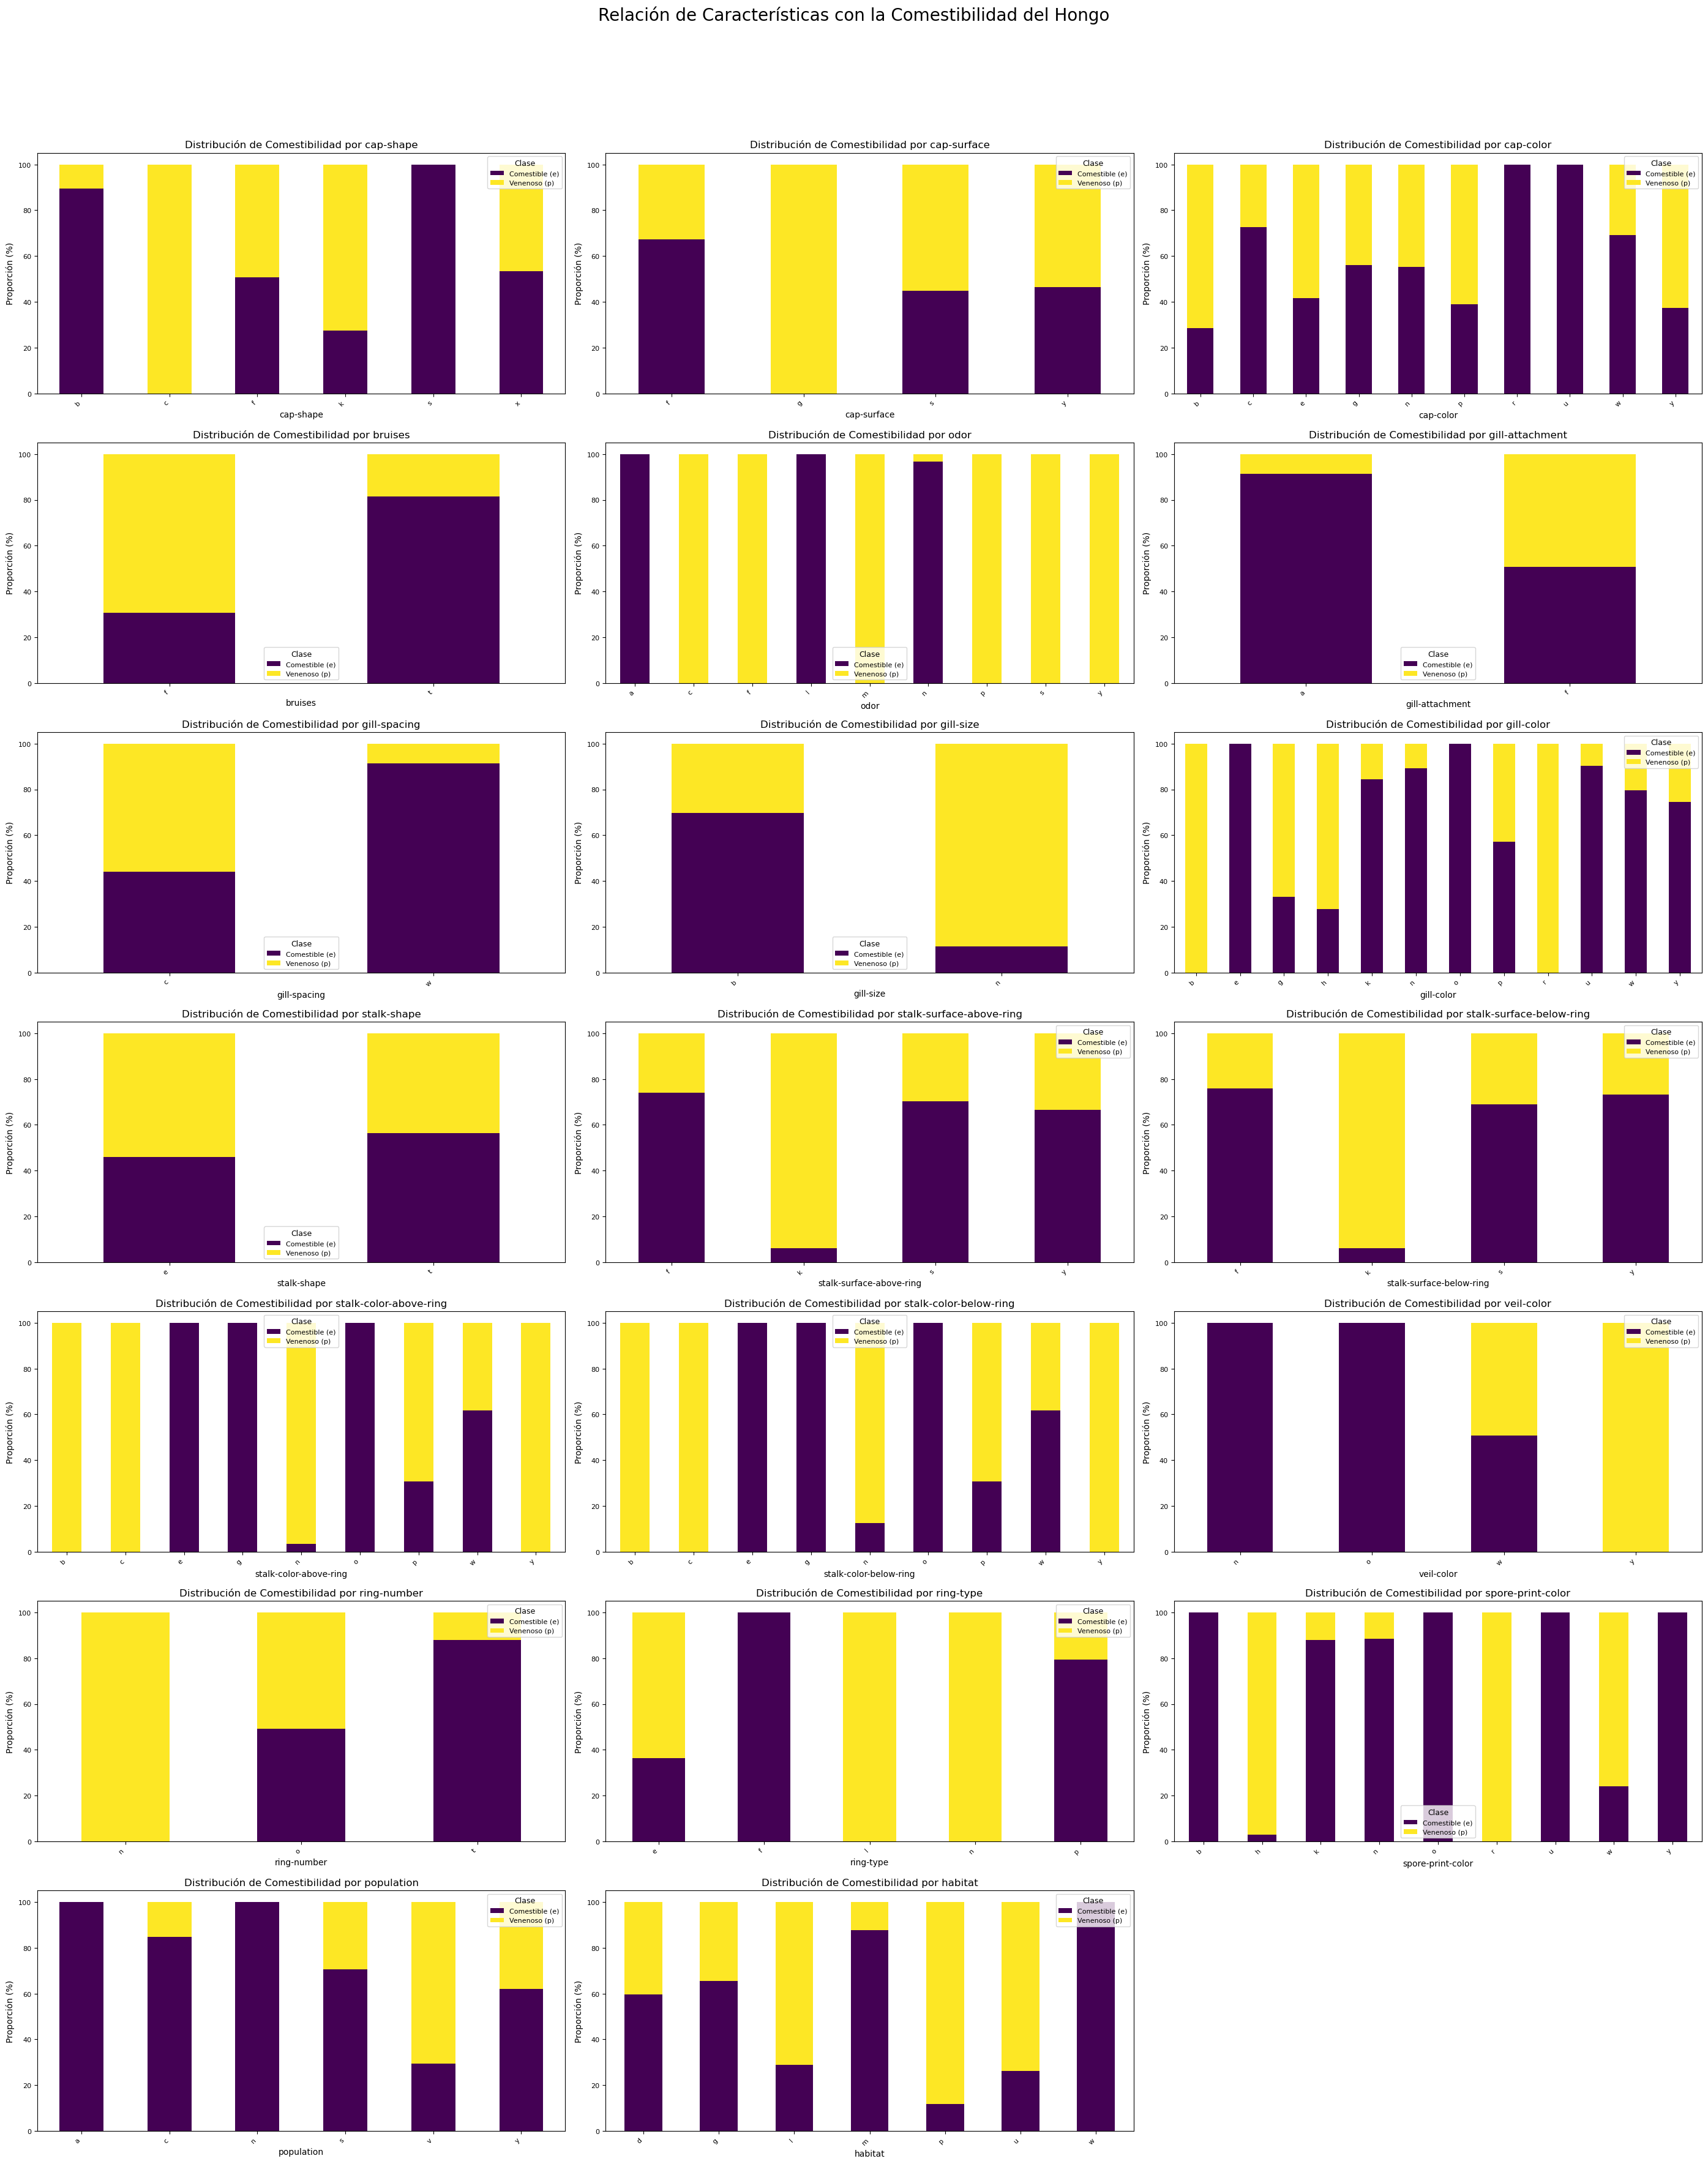

In [3]:
#Vamos a empezar el analisis EDA

# Vamos a codificar temporalmente la columna 'class' para los gráficos del EDA,
# así será más fácil visualizar 'poisonous' (1) y 'edible' (0).
eda_label_encoder = LabelEncoder()
df_mushrooms['class_encoded'] = eda_label_encoder.fit_transform(df_mushrooms['class'])
# Mapeo: 'e' -> 0, 'p' -> 1 (por orden alfabético)
print(f"Mapeo de clases para EDA: {list(eda_label_encoder.classes_)} -> {list(range(len(eda_label_encoder.classes_)))}")

# --- EDA Parte 1: Resumen General y Cardinalidad ---
print("\n--- Resumen General de Datos ---")
df_mushrooms.info() # Información general de columnas y tipos de datos
print("\nConteo de valores únicos por columna (excluyendo 'class', 'class_encoded'):")
for col in df_mushrooms.columns:
    if col not in ['class', 'class_encoded']:
        print(f"- {col}: {df_mushrooms[col].nunique()} valores únicos")

# --- EDA Parte 2: Relación de cada característica con la clase objetivo ---
print("\n--- Análisis de la relación de cada característica con la clase ('poisonous' vs 'edible') ---")

# Excluir las columnas que ya hemos analizado o que son el target
features_to_analyze = [col for col in df_mushrooms.columns if col not in ['class', 'class_encoded']]

# Ajustar el tamaño de la figura para que los gráficos sean legibles
plt.figure(figsize=(28, 40)) 
plt.suptitle('Relación de Características con la Comestibilidad del Hongo', fontsize=20, y=1.02)

for i, feature in enumerate(features_to_analyze):
    plt.subplot(8, 3, i + 1) 
    # Crear un crosstab para ver la distribución de la clase por cada valor de la característica
    cross_tab = pd.crosstab(df_mushrooms[feature], df_mushrooms['class'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis') 
    plt.title(f'Distribución de Comestibilidad por {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Proporción (%)', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=8) 
    plt.yticks(fontsize=8)
    plt.legend(title='Clase', labels=['Comestible (e)', 'Venenoso (p)'], fontsize=8, title_fontsize=9)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

plt.show()

Al observar los gráficos de distribución de características versus la clase (comestible/venenoso), la característica que destaca como el predictor más fuerte y obvio es el odor (olor).

- Los hongos con olor a almendra (a) o anís (l) son casi siempre comestibles.
- Por otro lado, los hongos con olores fétidos (f), a pescado (y), o picantes (p) son casi siempre venenosos.


Es importante notar que otras características, como el spore-print-color (color de la impresión de esporas) (especialmente el valor r para verde) y el ring-type (tipo de anillo) (con sus valores l para grande y p para colgante), también muestran una clara separación entre clases. De igual manera, algunos valores en gill-color (color de las láminas) y stalk-color-above-ring (color del tallo por encima del anillo) también revelan fuertes patrones.

Esta simple observación sugiere que el olor es un indicador muy potente para diferenciar los hongos comestibles de los venenosos en este dataset. Es probable que otros atributos también sean importantes, pero el olor es, sin duda, la característica más discriminatoria a primera vista.

In [4]:
# Columnas que una persona puede observar razonablemente bien para el streamlit
streamlit_features = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', # 'bruises' es fácil de ver
    'gill-color', 'stalk-shape', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number',
    'ring-type', 'population', 'habitat'
    # Excluidas: 'odor' (por la subjetividad humana), 'gill-size', 'gill-attachment' (más técnicas),
    # y 'spore-print-color' (requiere prueba de esporas).
]

X_streamlit_raw = df_mushrooms[streamlit_features]

<h2 style="color: 	#440154;"><strong>Feature engineering</strong></h2>

In [5]:
# División de los Datos en Conjuntos de Entrenamiento y Prueba
X = df_mushrooms[streamlit_features]
y = df_mushrooms['class']

# 'e' (edible) y 'p' (poisonous) se convertirán en números (0 y 1)
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# TODAS las columnas de X son categóricas, así que las seleccionamos todas
categorical_cols_for_ohe = X.columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols_for_ohe, drop_first=True)


# stratify=y_encoded asegura que la proporción de clases sea la misma en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded)

<h2 style="color: 	#440154;"><strong>Modelos machine learning</strong></h2>

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Mejores hiperparámetros encontrados para KNN: {'n_neighbors': 13}

--- Evaluación del KNN ---

Rendimiento en el Conjunto de ENTRENAMIENTO (KNN):
Reporte de Clasificación (Entrenamiento):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      3366
           p       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


Rendimiento en el Conjunto de PRUEBA (KNN):
Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           e       0.99      1.00      1.00       842
           p       1.00      0.99      0.99       783

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Matriz de Co

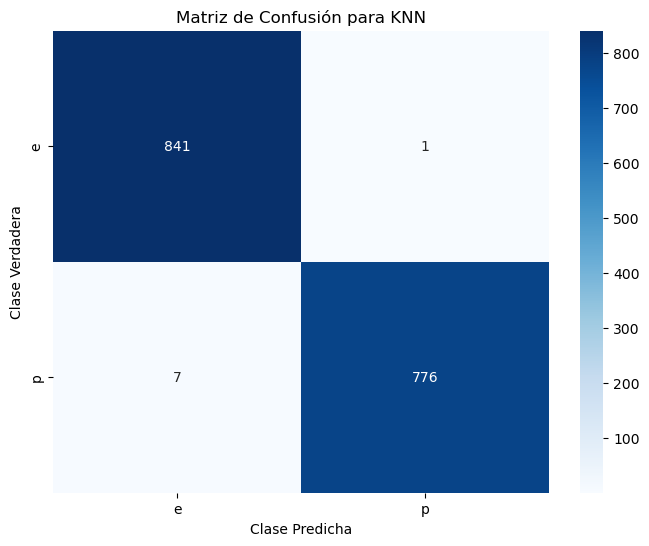

In [6]:
# Definimos los hiperparámetros a probar para KNN
param_grid = {'n_neighbors': np.arange(1, 31)} # Prueba de K=1 a K=30

# Inicializar el modelo KNN
knn = KNeighborsClassifier()

best_model, best_params = optimize_model_with_gridsearch(model_base=knn,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train, 
    model_name="KNN")

evaluate_and_report_model(
    model=best_model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,   
    y_test=y_test,   
    label_encoder=label_encoder_y,
    model_name="KNN"
)

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Mejores hiperparámetros encontrados para Árbol de Decisión: {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}

--- Evaluación del Árbol de Decisión ---

Rendimiento en el Conjunto de ENTRENAMIENTO (Árbol de Decisión):
Reporte de Clasificación (Entrenamiento):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      3366
           p       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


Rendimiento en el Conjunto de PRUEBA (Árbol de Decisión):
Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.

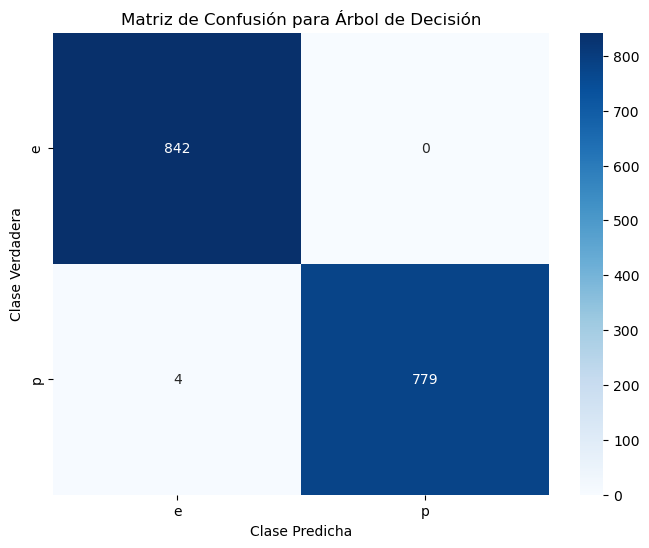

In [12]:
# Inicializar el modelo de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)

# Definimos la cuadrícula de hiperparámetros a probar para el Árbol de Decisión
param_grid_dt = {
    'max_depth': np.arange(3, 21, 2), # Profundidades desde 3 hasta 19, de 2 en 2
    'min_samples_split': [2, 5, 10], # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 3, 5]    # Mínimo de muestras en una hoja
}

best_dt_model, best_params = optimize_model_with_gridsearch(model_base=dt,
    param_grid=param_grid_dt,
    X_train=X_train,
    y_train=y_train, 
    model_name="Árbol de Decisión")

evaluate_and_report_model(
    model=best_dt_model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,   
    y_test=y_test,   
    label_encoder=label_encoder_y,
    model_name="Árbol de Decisión"
)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Mejores hiperparámetros encontrados para Bagging Classiefier: {'estimator__max_depth': 12, 'max_features': 0.7, 'max_samples': 0.8, 'n_estimators': 200}

--- Evaluación del Bagging Classiefier ---

Rendimiento en el Conjunto de ENTRENAMIENTO (Bagging Classiefier):
Reporte de Clasificación (Entrenamiento):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      3366
           p       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


Rendimiento en el Conjunto de PRUEBA (Bagging Classiefier):
Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      0.99      1.00       783

    accuracy                           1.0

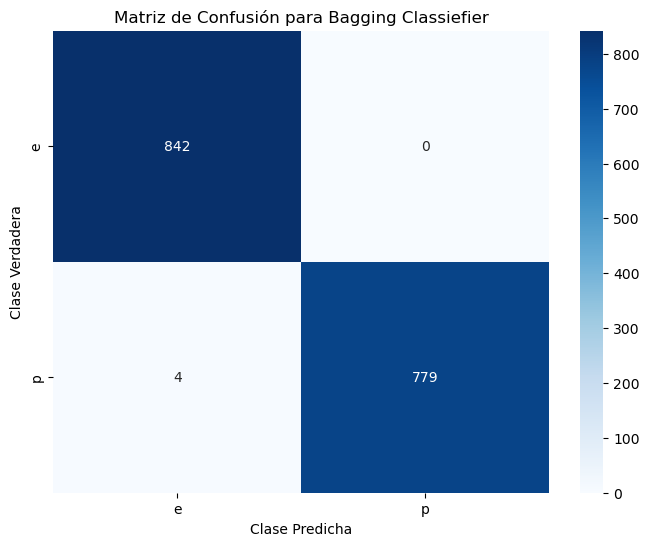

In [8]:
# Ahora vamos con los métodos de conjunto:
# Vamos a usar el modelo optimizado de el arbol de decision anterior 
base_estimator = best_model

# Inicializar el clasificador Bagging
bagging_model = BaggingClassifier(estimator=base_estimator, random_state=42)

# Ahora, solo necesitamos optimizar los parámetros propios de Bagging.
param_grid_bagging = {
    'n_estimators': [100, 200],        
    'max_samples': [0.7, 0.8],      
    'max_features': [0.7, 0.8],         
    'estimator__max_depth': [7, 12]  
}

best_model, best_params = optimize_model_with_gridsearch(model_base=bagging_model,
    param_grid=param_grid_bagging,
    X_train=X_train,
    y_train=y_train, 
    model_name="Bagging Classiefier")

evaluate_and_report_model(
    model=best_model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,   
    y_test=y_test,   
    label_encoder=label_encoder_y,
    model_name="Bagging Classiefier")

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\rocio\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Mejores hiperparámetros encontrados para AdaBoost Classifier: {'learning_rate': 1.0, 'n_estimators': 200}

--- Evaluación del AdaBoost Classifier ---

Rendimiento en el Conjunto de ENTRENAMIENTO (AdaBoost Classifier):
Reporte de Clasificación (Entrenamiento):
               precision    recall  f1-score   support

           e       0.96      0.97      0.96      3366
           p       0.96      0.96      0.96      3133

    accuracy                           0.96      6499
   macro avg       0.96      0.96      0.96      6499
weighted avg       0.96      0.96      0.96      6499


Rendimiento en el Conjunto de PRUEBA (AdaBoost Classifier):
Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           e       0.97      0.96      0.96       842
           p       0.95      0.97      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.9

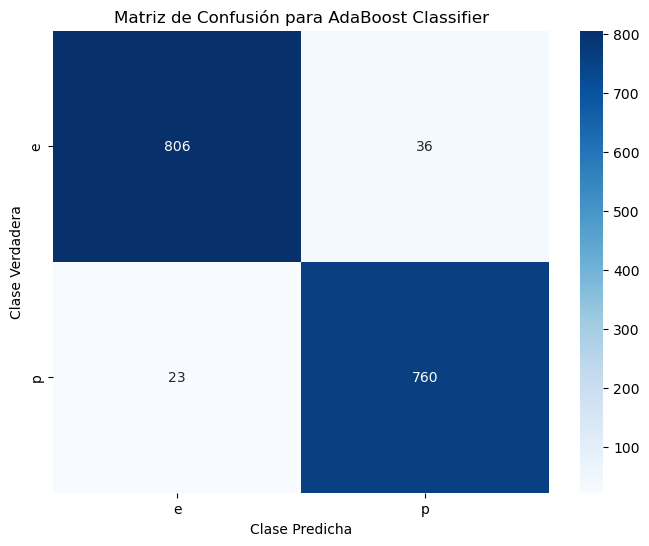

In [9]:
# AdaBoost está diseñado para funcionar mejor con clasificadores base muy simples y "débiles".
# Si los árboles base fueran ya muy complejos y buenos (como nuestro best_dt_model con max_depth=9) 
# tendrían muy pocos errores en los que concentrarse, y el proceso de boosting sería menos efectivo
# Usaremos entonces uno muy simple y no el que teniamos evitando el overfitting:
base_estimator_ada = DecisionTreeClassifier(max_depth=1, random_state=42)

# Inicializamos el clasificador AdaBoost
ada_model = AdaBoostClassifier(estimator=base_estimator_ada, random_state=42)

# Definimos la cuadrícula de parámetros para AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200], # Prueba 50, 100, 200 árboles base
    'learning_rate': [0.01, 0.1, 1.0] # Prueba diferentes tasas de aprendizaje
}


best_model_ada, best_params_ada = optimize_model_with_gridsearch(
    model_base=ada_model, 
    param_grid=param_grid_ada,
    X_train=X_train,
    y_train=y_train,
    model_name="AdaBoost Classifier" 
)


evaluate_and_report_model(
    model=best_model_ada, 
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    label_encoder=label_encoder_y,
    model_name="AdaBoost Classifier"
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Mejores hiperparámetros encontrados para Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}

--- Evaluación del Gradient Boosting ---

Rendimiento en el Conjunto de ENTRENAMIENTO (Gradient Boosting):
Reporte de Clasificación (Entrenamiento):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      3366
           p       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


Rendimiento en el Conjunto de PRUEBA (Gradient Boosting):
Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00     

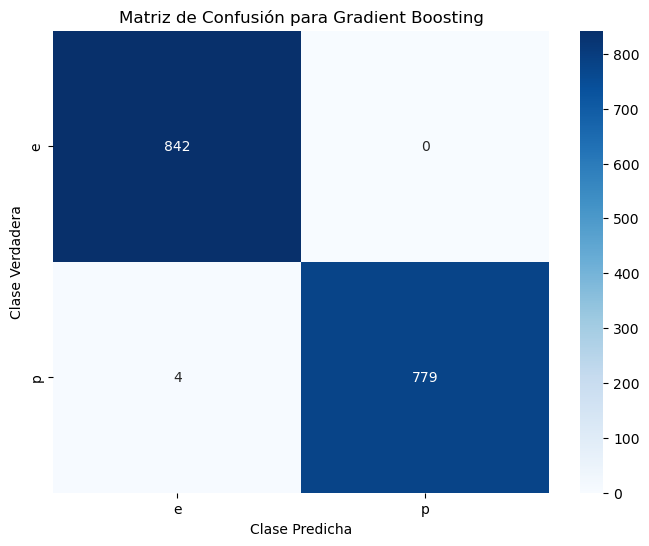

In [10]:
# Inicializamos el clasificador Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Definimos la cuadrícula de parámetros para Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],      # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 5]                 # Profundidad máxima de cada árbol base
}

best_model, best_params_ada = optimize_model_with_gridsearch(
    model_base=gb_model, 
    param_grid=param_grid_gb,
    X_train=X_train,
    y_train=y_train,
    model_name="Gradient Boosting" 
)

evaluate_and_report_model(
    model=best_model, 
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    label_encoder=label_encoder_y,
    model_name="Gradient Boosting"
)

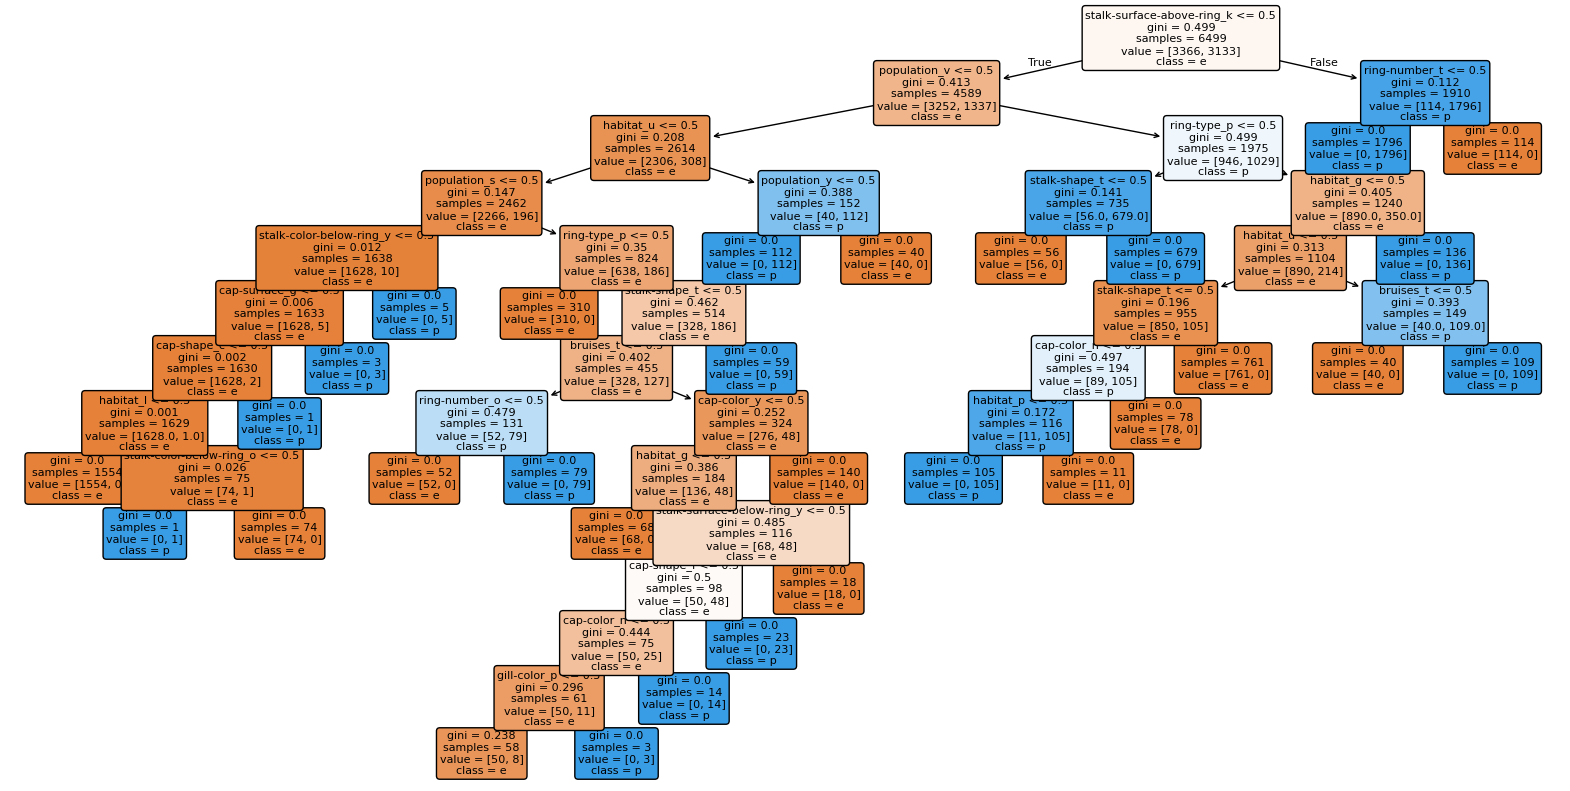

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model,
          feature_names=X_encoded.columns.tolist(), # Usa las columnas de X_encoded
          class_names=label_encoder_y.classes_,     # 'e' y 'p'
          filled=True,
          rounded=True,
          fontsize=8)
plt.show()

<h3 style="color:#440154;"><strong>Elegimos el Árbol de Decisión: Transparencia y Seguridad</strong></h3>

Para nuestro trabajo de identificación de setas, nos decidimos por el **Árbol de Decisión**. A diferencia de otros modelos más complejos, el Árbol de Decisión nos permite **explicar claramente** cómo llega a sus predicciones. Funciona como un diagrama de flujo simple, haciendo preguntas sobre las características de la seta hasta clasificarla como comestible o venenosa.

Esta **transparencia** es clave para generar **confianza** en el usuario, especialmente en una aplicación donde la **seguridad** es lo más importante. Nuestro modelo, entrenado con características fácilmente observables por cualquier persona, ha demostrado un **rendimiento excelente** en la identificación, minimizando el riesgo de errores peligrosos.

---

<h3 style="color:#440154;"><strong>Nuestro Proceso de Desarrollo</strong></h3>

Hemos trabajado juntos para construir un modelo robusto y fiable. Aquí un resumen de los pasos clave:

1.  **Preparación de Datos:**
    * Cargamos el dataset de hongos y realizamos una limpieza inicial.
    * **Identificamos y eliminamos "fugas de datos"** que hacían que el modelo predijera con un 100% de acierto de forma irreal. Esto fue fundamental para que el modelo aprendiera patrones genuinos.

2.  **Selección de Características:**
    * Elegimos cuidadosamente las características de la seta (como la forma y color del sombrero, si tiene moretones, el color de las láminas, etc.) que un usuario puede observar y reportar fácilmente. Excluimos otras que son más técnicas o subjetivas (como el olor o el color de las esporas).

3.  **Preprocesamiento y División:**
    * Convertimos las características seleccionadas a un formato que los modelos pudieran interpretar (**One-Hot Encoding**).
    * Dividimos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento real del modelo en datos que nunca antes había visto.

4.  **Entrenamiento y Optimización de Modelos:**
    * Entrenamos y optimizamos varios tipos de modelos (KNN, Árbol de Decisión, Bagging, AdaBoost, Gradient Boosting) para encontrar la mejor configuración para cada uno.

5.  **Análisis de Rendimiento y Elección Final:**
    * Evaluamos el rendimiento de cada modelo. A pesar de haber eliminado las características "perfectas", muchos modelos seguían obteniendo una precisión muy alta, demostrando la naturaleza distintiva del dataset.
    * Finalmente, basándonos en la crucial **interpretabilidad** y **seguridad** , seleccionamos el **Árbol de Decisión** como la opción ideal.
